# Boston Marathon 2013 Dataset

In [1]:
#standard imports
import pandas as pd
import numpy as np
import scipy
#graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.plotly as py
#sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

3.1.0


## Read in Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv') 

In [3]:
df.sample(10)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
1521,104.03,54,"Schafer, Robert J.",514,40.57,M,87.40,203.60,1890,NaN,...,6705,7.77,AZ,126.17,19.97,5559,82.73,155.98,Scottsdlae,190.95
6122,111.12,34,"Guardia, Joy E.",211,44.53,F,93.88,186.17,7411,NaN,...,3036,7.12,IL,133.37,22.40,241,89.03,155.30,Springfield,176.77
12228,123.35,55,"Friis, Rolf A",263,49.40,M,103.92,210.00,14921,NaN,...,8453,8.02,ON,148.92,24.88,6595,98.58,174.50,Ottawa,199.17
5497,113.27,45,"Davies, Loren T.",828,44.37,M,94.77,202.65,6670,NaN,...,6465,7.73,NY,138.55,22.20,5411,89.78,165.52,Liverpool,191.20
14726,132.17,57,"Gropper, Frederick J",906,53.72,M,111.55,245.05,18066,NaN,...,16785,9.35,PA,160.28,26.88,10264,105.80,190.72,Yardley,229.10
2256,114.58,26,"Bates, David",2648,46.03,M,96.62,197.97,2783,NaN,...,5355,7.57,ME,138.52,23.03,4667,91.65,163.10,Tenants Harbor,187.57
1797,105.52,46,"Mckeon, Michael P",337,41.80,M,88.68,189.05,2223,NaN,...,3559,7.22,FL,128.28,21.00,3259,84.03,152.83,Flagler Beach,177.70
3862,106.00,38,"Roy Gagnon, Sebastien",1775,42.48,M,89.48,184.18,4702,NaN,...,2723,7.03,QC,127.87,21.47,2528,84.90,151.03,Trois-Rivieres,174.30
3957,106.48,31,"Timm, Christopher A.",1619,42.42,M,89.78,182.25,4816,NaN,...,2452,6.97,MN,128.63,21.22,2283,85.12,150.68,Minneapolis,172.70
479,119.90,30,"Esler, Ty J",3503,44.82,M,98.85,231.77,585,NaN,...,14258,8.85,TX,151.00,22.02,9208,93.37,184.00,Austin,217.48


### Dataset Description

In [4]:
df.describe()

,age,division,official,overall,pace,genderdiv
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000
mean,41.638332,1100.967025,208.159470,8429.373422,7.947398,4351.684732
std,10.351311,942.114816,23.743608,5052.024116,0.905739,2772.398239
min,18.000000,1.000000,85.530000,1.000000,3.270000,1.000000
25%,34.000000,363.000000,191.727500,4061.750000,7.320000,2032.750000
50%,42.000000,842.000000,209.225000,8247.500000,7.980000,4113.500000
75%,49.000000,1560.000000,225.230000,12662.250000,8.600000,6316.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


#### This helps us get a quick grasp of the numeric data we have in our dataframe so that we better understand what a "good" race time is, and the average ages of those competing.

In [5]:
df.gender.value_counts()

M    9680
F    6484
Name: gender, dtype: int64

## Visualizations

In [6]:
x = df.official
data = [go.Histogram(x=x)]

layout = go.Layout(
    title='Boston Marathon Finish Times in Minutes',
    xaxis=dict(
        title='Finish Time in Minutes',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic histogram')   

### There are some outliers in the data.  Those finishing well under 150 minutes are clearly top performers, and are not representative of the group.  Let's see how the race time is by gender.

In [7]:
x0 = df.groupby('gender').get_group('M').official
x1 = df.groupby('gender').get_group('F').official

Men = go.Histogram(
    x=x0,
    opacity=0.75,
    name='Men'
)
Women = go.Histogram(
    x=x1,
    opacity=0.75,
    name='Women'
)

data = [Men, Women]
layout = go.Layout(
    barmode='overlay',
    title='Boston Marathon Finish Times in Minutes by Gender',
    xaxis=dict(
        title='Finish Time in Minutes',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )

)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

### According to the data, men do tend to have a faster race time than women. 

In [8]:
x0 = df.groupby('gender').get_group('M').pace
x1 = df.groupby('gender').get_group('F').pace

trace0 = go.Histogram(
    x=x0,
    opacity=0.75,
    name='Men'
)
trace1 = go.Histogram(
    x=x1,
    opacity=0.75,
    name='Women'
)

data = [trace0, trace1]
layout = go.Layout(
    barmode='overlay',
    title='Boston Marathon Pace in Minutes by Gender',
    xaxis=dict(
        title='Mile Pace in Minutes',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )

)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

### The same trend holds here in mile pace.  Female racers have a slower average mile pace than men in general.

In [9]:
X = df

In [10]:
#X['official'].groupby(pd.cut(X['age'], range(15,90,5))).aggregate(np.average).plot(kind="bar", title="Average time by age group")


### I needed to quickly group the age data, so that we can group it, and better understand it. The following function will assist with this.

In [11]:
def age_buckets(x): 
    if x < 30: return '18-29' 
    elif x < 40: return '30-39' 
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x >=70: return '70+' 
    else: return 'other'
X['agerange'] = X.age.apply(age_buckets)

In [12]:
X.head(10)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,pace,state,30k,5k,genderdiv,20k,35k,city,40k,agerange
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55,18-29
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77,30-39
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78,18-29
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43,30-39
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88,30-39
5,77.25,28,"Gebremariam, Gebregziabher",3,30.88,M,64.92,130.47,3,NaN,...,4.98,NaN,92.72,15.93,3,61.53,108.70,Tigray,123.78,18-29
6,50.50,42,"Soejima, Masazumi",6,18.73,M,41.98,90.02,W4,NaN,...,3.43,NaN,61.63,8.98,6,39.87,74.00,Fukuoka,84.67,40-49
7,77.23,28,"Geneti, Markos",6,30.88,M,64.90,132.73,4,NaN,...,5.07,NaN,92.93,15.90,6,61.52,109.07,Addis Ababa,125.20,18-29
8,52.62,49,"Schabort, Krige",11,19.77,M,43.97,91.78,W5,NaN,...,3.50,GA,64.00,9.38,11,41.77,75.95,Cedartown,86.48,40-49
9,77.25,32,"Merga, Deriba",25,30.90,M,64.92,141.67,5,NaN,...,5.42,NaN,92.77,15.93,27,61.53,111.13,Addis Ababa,131.98,30-39


### One last visualization for now, a violin plot, grouped by Gender.

In [13]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": X['agerange'] [ X['gender'] == 'M' ],
            "y": X['official'] [ X['gender'] == 'M' ],
            "legendgroup": 'M',
            "scalegroup": 'M',
            "name": 'M',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        },
        {
            "type": 'violin',
            "x": X['agerange'] [ X['gender'] == 'F' ],
            "y": X['official'] [ X['gender'] == 'F' ],
            "legendgroup": 'F',
            "scalegroup": 'F',
            "name": 'F',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'purple'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violinmode": "group"
    }
}


iplot(fig, filename = 'violin/grouped', validate = False)

In [14]:
X.head(1)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,pace,state,30k,5k,genderdiv,20k,35k,city,40k,agerange
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.9,W1,NaN,...,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55,18-29


### Since we'll be running clustering algorithims on this data, we will want to remove categorical data at this point. The data removed generally would not have been useful, since there would not be much to garner from things like name and bib number.

In [15]:
X.drop(['name', 'bib', 'ctz', 'country','city', 'state'], axis=1, inplace=True)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 16 columns):
25k          16164 non-null object
age          16164 non-null int64
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
overall      16164 non-null int64
pace         16164 non-null float64
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
40k          16164 non-null object
agerange     16164 non-null object
dtypes: float64(2), int64(4), object(10)
memory usage: 2.0+ MB


In [17]:
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
X[numeric] = X[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)
X.dtypes

25k          float64
age          float64
division       int64
10k          float64
gender        object
half         float64
official     float64
overall      float64
pace         float64
30k          float64
5k           float64
genderdiv      int64
20k          float64
35k          float64
40k          float64
agerange      object
dtype: object

In [18]:
X['gender_binary'] = pd.Series(np.where(X.gender.values == 'F', 1, 0), X.index)

In [19]:
X.dtypes

25k              float64
age              float64
division           int64
10k              float64
gender            object
half             float64
official         float64
overall          float64
pace             float64
30k              float64
5k               float64
genderdiv          int64
20k              float64
35k              float64
40k              float64
agerange          object
gender_binary      int64
dtype: object

In [20]:
X.drop(['gender'], axis=1, inplace=True)

In [21]:
X.head(1)

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,agerange,gender_binary
0,49.87,28.0,9,18.18,40.93,90.9,9.0,3.47,62.07,8.9,9,38.8,74.73,85.55,18-29,0


In [22]:
X.agerange.unique()

array(['18-29', '30-39', '40-49', '50-59', '60-69', '70+'], dtype=object)

In [23]:
def age_buckets_numeric(x): 
    if x < 30: return 0 
    elif x < 40: return 1 
    elif x < 50: return 2 
    elif x < 60: return 3 
    elif x < 70: return 4 
    elif x >=70: return 5 
    else: return 'other'
X['agerange_num'] = X.age.apply(age_buckets_numeric)

In [24]:
X.sample(10)

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,agerange,gender_binary,agerange_num
2186,104.93,31.0,1766,41.85,88.47,184.05,2707.0,7.03,126.65,21.03,2514,83.83,149.30,173.47,30-39,0,1
16003,137.27,50.0,455,54.65,114.47,242.62,16469.0,9.27,167.17,27.45,6329,108.48,198.92,229.30,50-59,1,3
15512,126.38,45.0,566,48.03,105.85,229.28,13699.0,8.75,153.22,23.90,4718,100.08,183.78,215.58,40-49,1,2
7720,113.20,36.0,531,43.92,94.85,197.20,5182.0,7.53,137.35,21.47,646,89.98,162.02,186.53,30-39,1,1
10646,124.68,51.0,957,50.23,105.43,215.60,10003.0,8.23,150.25,25.08,7326,100.07,176.68,203.82,50-59,0,3
5871,112.28,41.0,850,44.97,94.68,195.80,4881.0,7.48,136.15,22.82,4323,89.82,160.67,185.23,40-49,0,2
14155,126.70,57.0,849,48.88,105.77,239.50,15995.0,9.15,157.40,24.77,9958,100.08,189.95,225.33,50-59,0,3
10109,130.13,52.0,1454,49.05,108.28,238.92,15883.0,9.12,160.27,23.80,9912,102.27,192.23,224.42,50-59,0,3
9169,125.77,58.0,381,51.85,106.63,215.55,9988.0,8.23,151.45,25.87,7318,101.07,177.23,203.57,50-59,0,3
1252,99.75,25.0,807,39.10,83.48,173.30,1090.0,6.62,121.18,19.62,1027,79.02,142.77,163.92,18-29,0,0


### Make sure we don't have any nulls before we get going.

In [25]:
X = X.dropna()

In [26]:
X.shape

(16054, 17)

In [27]:
X.gender_binary.value_counts()

0    9608
1    6446
Name: gender_binary, dtype: int64

In [28]:
X.drop(['agerange'], axis=1, inplace=True)

/anaconda3/envs/root-copy/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [29]:
X_transform = X

## Clustering Evaluation

### We'll try 4 types of clustering evaluations, K Means, Affinity Propagation, Spectral, and Mean Shift.

### KMeans

### Elbow Method to find number of clusters

In [30]:
X_transform.shape

(16054, 16)

In [31]:
X_transform.head(1)

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,gender_binary,agerange_num
0,49.87,28.0,9,18.18,40.93,90.9,9.0,3.47,62.07,8.9,9,38.8,74.73,85.55,0,0


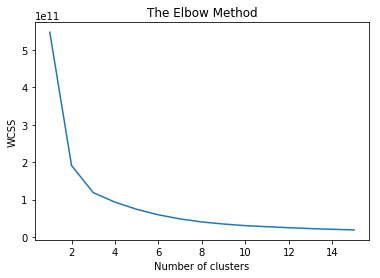

In [32]:
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_transform)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [33]:
X_transform.shape

(16054, 16)

In [34]:
y = X_transform.gender_binary

In [35]:
X_transform.drop(['gender_binary'], axis=1, inplace=True)

/anaconda3/envs/root-copy/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
X_transform.head(1)

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,agerange_num
0,49.87,28.0,9,18.18,40.93,90.9,9.0,3.47,62.07,8.9,9,38.8,74.73,85.55,0


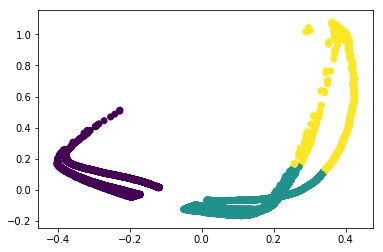

Comparing k-means clusters against the data:
gender_binary     0     1
row_0                    
0                 0  6437
1              8596     0
2              1012     9


In [47]:
#Normalize data
X_norm = normalize(X)

#2 components
X_pca = PCA(2).fit_transform(X_norm)

#predicted values
y_pred = KMeans(n_clusters = 3, n_init = 20, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [39]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    n_init=20,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1     2
row_0                  
0         0  1457  1021
1      6437     0     0
2         0  7139     0


In [48]:
#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.7, random_state=42)

In [49]:
X_train.head(1)

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,agerange_num
10259,122.02,35.0,1663,49.22,102.97,212.13,9034.0,8.1,147.5,24.8,2160,97.62,173.67,200.28,1


### Mean Shift

In [52]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


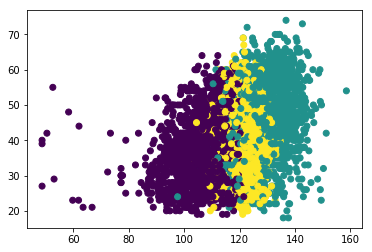

Comparing the assigned categories to the ones in the data:
col_0             0    1    2
gender_binary                
0              1537  829  471
1               363  740  876


In [54]:
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))    

### This looks much better. Let's still try Spectral Clustering.

In [ ]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

/anaconda3/envs/root-copy/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

In [ ]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()